In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [4]:
df=pd.read_csv("/content/drive/MyDrive/network_traffic_analysis_dataset.csv")


In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [6]:
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)

original length of df: 525466


In [9]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [8]:
df.dropna(inplace=True)

In [7]:
df.Label.value_counts()

BENIGN      238221
PortScan    158804
DDoS        128025
Name: Label, dtype: int64

In [8]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525050 entries, 0 to 525464
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             525050 non-null  int64  
 1   Flow Duration                525050 non-null  int64  
 2   Total Fwd Packets            525050 non-null  int64  
 3   Total Backward Packets       525050 non-null  int64  
 4   Total Length of Fwd Packets  525050 non-null  int64  
 5   Total Length of Bwd Packets  525050 non-null  int64  
 6   Fwd Packet Length Max        525050 non-null  int64  
 7   Fwd Packet Length Min        525050 non-null  int64  
 8   Fwd Packet Length Mean       525050 non-null  float64
 9   Fwd Packet Length Std        525050 non-null  float64
 10  Bwd Packet Length Max        525050 non-null  int64  
 11  Bwd Packet Length Min        525050 non-null  int64  
 12  Bwd Packet Length Mean       525050 non-null  float64
 13 

In [10]:
df.shape

(525050, 79)

In [11]:
df.isnull()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

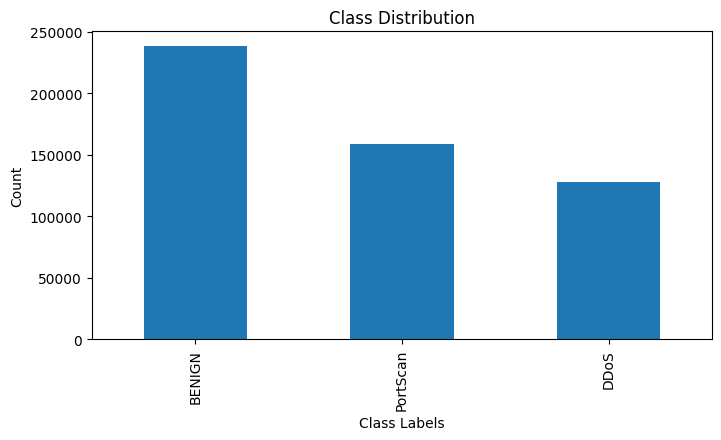

In [14]:


# Count the occurrences of each class label
class_counts = df['Label'].value_counts()

# Plot the class distribution using a bar chart
plt.figure(figsize=(8, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


<ipython-input-16-e234dfbe3a68>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


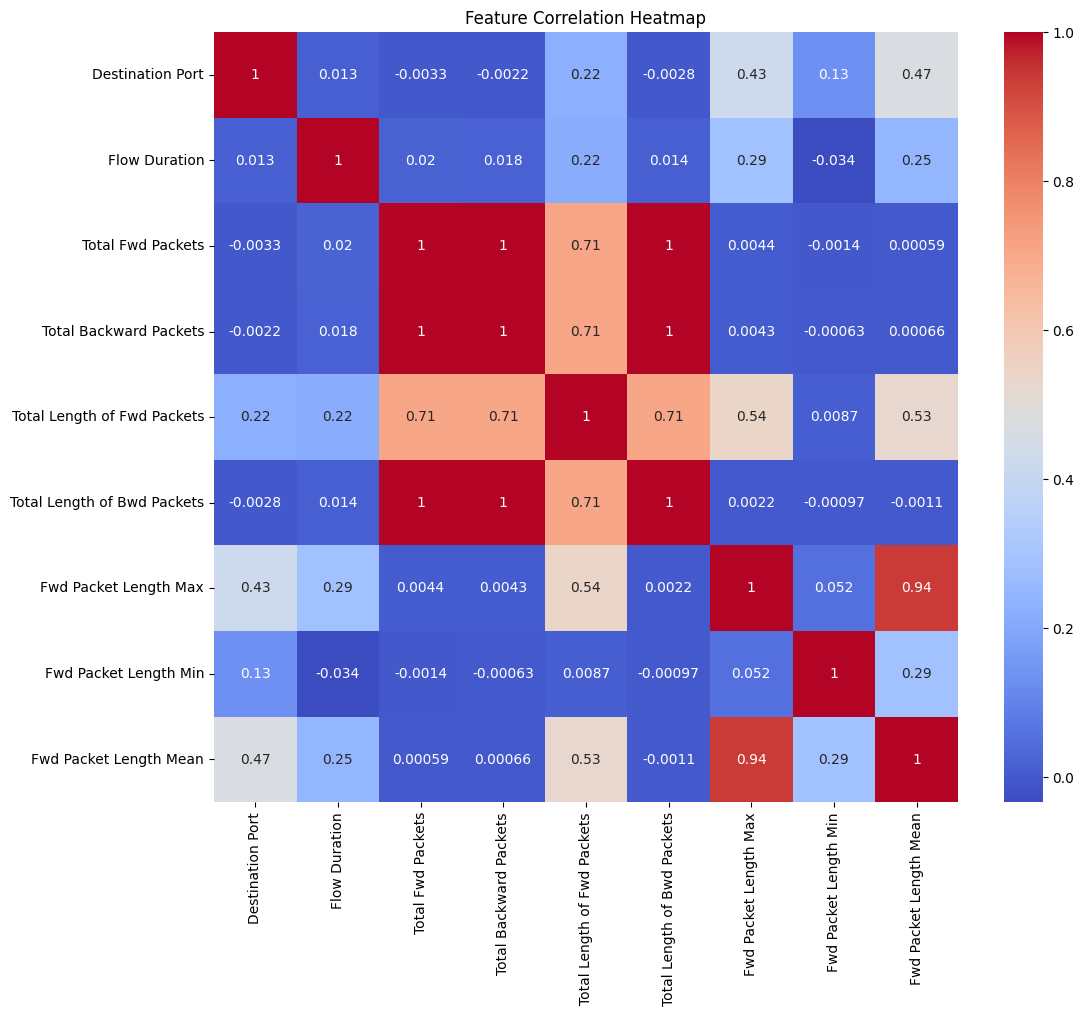

In [16]:



df1=df[['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean','Label']]
# Compute the correlation matrix
corr_matrix = df1.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


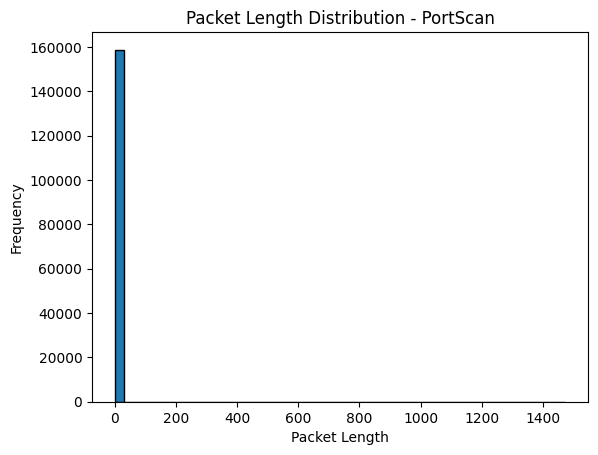

In [33]:


# Filter the dataset for a specific network traffic class (e.g., 'Normal', 'Attack 1', 'Attack 2')
traffic_class = 'PortScan'  # Replace 'Normal' with the desired traffic class
filtered_df = df[df['Label'] == traffic_class]

# Extract the packet length values for the selected traffic class
packet_lengths = filtered_df['Total Length of Fwd Packets'].values

# Plot the histogram of packet lengths
plt.hist(packet_lengths, bins=50, edgecolor='black')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.title('Packet Length Distribution - ' + traffic_class)
plt.show()


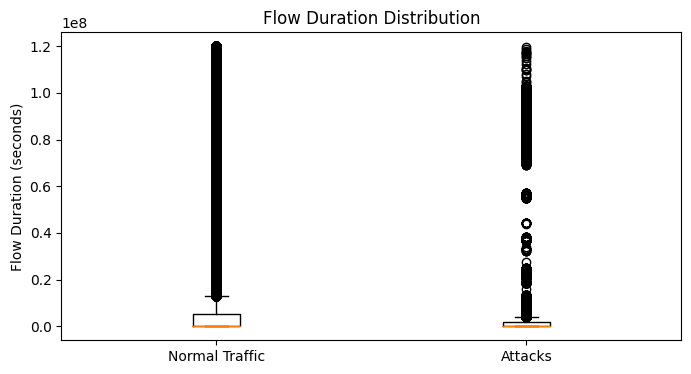

In [25]:


# Separate the data for normal traffic and attacks
normal_traffic = df[df['Label'] == 'BENIGN']
attacks = df[df['Label'] != 'BENIGN']

# Plot the flow duration distribution for normal traffic and attacks
plt.figure(figsize=(8, 4))
plt.boxplot([normal_traffic['Flow Duration'], attacks['Flow Duration']], labels=['Normal Traffic', 'Attacks'])
plt.ylabel('Flow Duration (seconds)')
plt.title('Flow Duration Distribution')
plt.show()


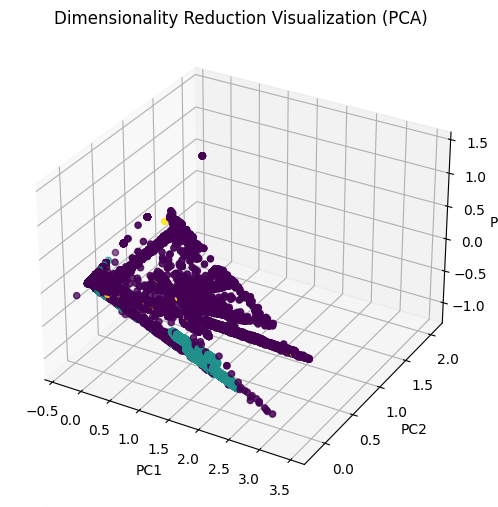

In [29]:

# Separate the features from the target variable
X = df.drop('Label', axis=1)
y = df['Label']
from sklearn.preprocessing import LabelEncoder

# Encode the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Perform dimensionality reduction using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a 3D plot to visualize the data in reduced dimensions
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Dimensionality Reduction Visualization (PCA)')
plt.show()


In [41]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:

# Compute the correlation matrix
correlation_matrix = df.corr().abs()

# Set the threshold for correlation
threshold = 0.8  # Adjust the threshold value as desired

# Find the highly correlated features
highly_correlated_features = np.where(correlation_matrix > threshold)

# Get the unique feature pairs
feature_pairs = [(df.columns[x], df.columns[y]) for x, y in zip(*highly_correlated_features) if x != y and x < y]

# Create a new dataframe with the highly correlated features and label dataset
new_df = df[list(set(df.columns) - set([y for x, y in feature_pairs]))]

# Print the new dataframe
print(new_df.head())


<ipython-input-11-5d47f39beb73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


   Bwd Avg Bulk Rate  Init_Win_bytes_forward  Flow Packets/s  \
0                0.0                    33.0    666666.66670   
1                0.0                    29.0     18348.62385   
2                0.0                    29.0     38461.53846   
3                0.0                    31.0     58823.52941   
4                0.0                    32.0    666666.66670   

   Fwd Avg Bytes/Bulk  Flow Duration  Init_Win_bytes_backward  PSH Flag Count  \
0                 0.0              3                     -1.0             0.0   
1                 0.0            109                    256.0             0.0   
2                 0.0             52                    256.0             0.0   
3                 0.0             34                    329.0             0.0   
4                 0.0              3                     -1.0             0.0   

   Down/Up Ratio  CWE Flag Count  RST Flag Count  ...  Active Std  \
0            0.0             0.0             0.0  ...      

In [51]:
feature_pairs

[('Flow Duration', 'Flow IAT Max'),
 ('Flow Duration', 'Fwd IAT Total'),
 ('Flow Duration', 'Fwd IAT Max'),
 ('Flow Duration', 'Idle Max'),
 ('Total Fwd Packets', 'Total Backward Packets'),
 ('Total Fwd Packets', 'Total Length of Bwd Packets'),
 ('Total Fwd Packets', 'Fwd Header Length'),
 ('Total Fwd Packets', 'Bwd Header Length'),
 ('Total Fwd Packets', 'Fwd Header Length.1'),
 ('Total Fwd Packets', 'Subflow Fwd Packets'),
 ('Total Fwd Packets', 'Subflow Bwd Packets'),
 ('Total Fwd Packets', 'Subflow Bwd Bytes'),
 ('Total Fwd Packets', 'act_data_pkt_fwd'),
 ('Total Backward Packets', 'Total Length of Bwd Packets'),
 ('Total Backward Packets', 'Fwd Header Length'),
 ('Total Backward Packets', 'Bwd Header Length'),
 ('Total Backward Packets', 'Fwd Header Length.1'),
 ('Total Backward Packets', 'Subflow Fwd Packets'),
 ('Total Backward Packets', 'Subflow Bwd Packets'),
 ('Total Backward Packets', 'Subflow Bwd Bytes'),
 ('Total Backward Packets', 'act_data_pkt_fwd'),
 ('Total Length of F

In [60]:
new_df.head()

,PSH Flag Count,Flow Packets/s,Fwd Packet Length Max,Init_Win_bytes_forward,Fwd Avg Bulk Rate,Bwd Avg Packets/Bulk,URG Flag Count,Destination Port,Bwd IAT Std,Flow Duration,...,Bwd Avg Bytes/Bulk,Total Length of Fwd Packets,Idle Std,Active Std,Min Packet Length,Fwd URG Flags,Active Mean,min_seg_size_forward,Bwd Packet Length Min,Bwd Avg Bulk Rate
0,0.0,666666.66670,6,33.0,0.0,0.0,0.0,54865,0.0,3,...,0.0,12,0.0,0.0,6.0,0.0,0.0,20.0,0,0.0
1,0.0,18348.62385,6,29.0,0.0,0.0,1.0,55054,0.0,109,...,0.0,6,0.0,0.0,6.0,0.0,0.0,20.0,6,0.0
2,0.0,38461.53846,6,29.0,0.0,0.0,1.0,55055,0.0,52,...,0.0,6,0.0,0.0,6.0,0.0,0.0,20.0,6,0.0
3,0.0,58823.52941,6,31.0,0.0,0.0,1.0,46236,0.0,34,...,0.0,6,0.0,0.0,6.0,0.0,0.0,20.0,6,0.0
4,0.0,666666.66670,6,32.0,0.0,0.0,0.0,54863,0.0,3,...,0.0,12,0.0,0.0,6.0,0.0,0.0,20.0,0,0.0


In [12]:
classes = new_df['Label'].copy()
features = new_df.drop(['Label'], axis=1)

# Encode the class labels
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)

x_train, x_test, y_train, y_test = train_test_split(features,encoded_classes , test_size=0.2, random_state=40)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(420040, 39) (105010, 39) (420040,) (105010,)


In [16]:
x_train

array([[ 0.        , -0.62552915, -0.25022434, ...,  0.00840025,
         0.        , -0.16757888],
       [ 0.        , -0.62080808, -0.24989545, ..., -0.0092991 ,
         0.        , -0.16757888],
       [ 0.        ,  0.00989455, -0.2501323 , ..., -0.00536591,
         0.        , -0.16757888],
       ...,
       [ 0.        ,  0.00989455, -0.25018099, ..., -0.00536591,
         0.        , -0.16757888],
       [ 0.        , -0.62512906, -0.25022265, ..., -0.00339931,
         0.        , -0.11300009],
       [ 0.        , -0.56367516,  0.00143074, ..., -0.0092991 ,
         0.        , -0.14938595]])

In [62]:
classes

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
525460    BENIGN
525461    BENIGN
525462    BENIGN
525463    BENIGN
525464    BENIGN
Name: Label, Length: 525050, dtype: object

In [15]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
y_train

array([0, 0, 1, ..., 1, 1, 2])

In [65]:


# Step 3: Building DNDF
# Step 3.1: Train a deep neural network as the backbone
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  




In [72]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
13127/13127 [==============================] - 51s 4ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 2/10
13127/13127 [==============================] - 48s 4ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0277 - val_accuracy: 0.9931
Epoch 3/10
13127/13127 [==============================] - 46s 4ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 4/10
13127/13127 [==============================] - 48s 4ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 5/10
13127/13127 [==============================] - 48s 4ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 6/10
13127/13127 [==============================] - 46s 4ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 7/10
13127/13127 [==============================] - 51s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0

In [68]:
# Step 3.2: Extract learned features from the last hidden layer
feature_extractor = Sequential(model.layers[:-1])
X_train_features = feature_extractor.predict(x_train)
X_test_features = feature_extractor.predict(x_test)

3282/3282 [==============================] - 5s 2ms/step


In [69]:
# Step 4: Decision Tree Construction
tree = DecisionTreeClassifier()
ensemble = BaggingClassifier(base_estimator=tree, n_estimators=10, random_state=42)
ensemble.fit(X_train_features, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [70]:
# Step 5: Ensemble Learning (No additional code required)

# Step 6: Model Evaluation
y_pred = ensemble.predict(x_test_features)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996857442148367


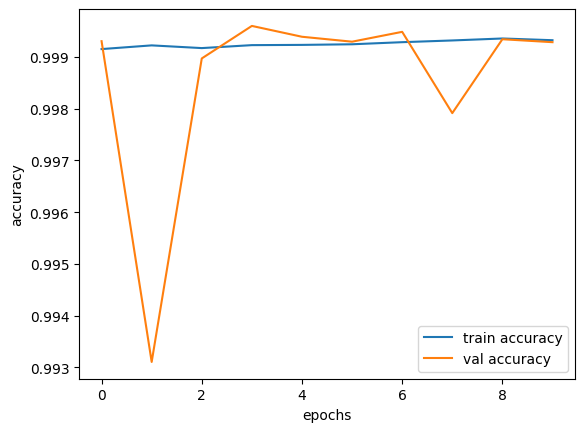

In [73]:
epochs = list(range(10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

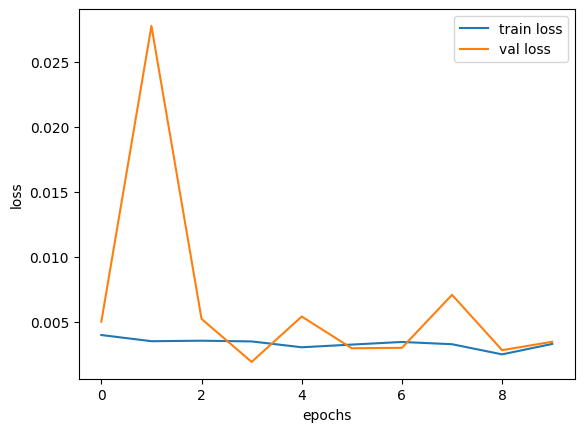

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [76]:
accuracy_score(y_test, y_pred)

0.9996857442148367

In [77]:
from sklearn import metrics

In [80]:
macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.9996610203894543


In [81]:
macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.9996937561711238


In [82]:
macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.9996773826878403


In [83]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

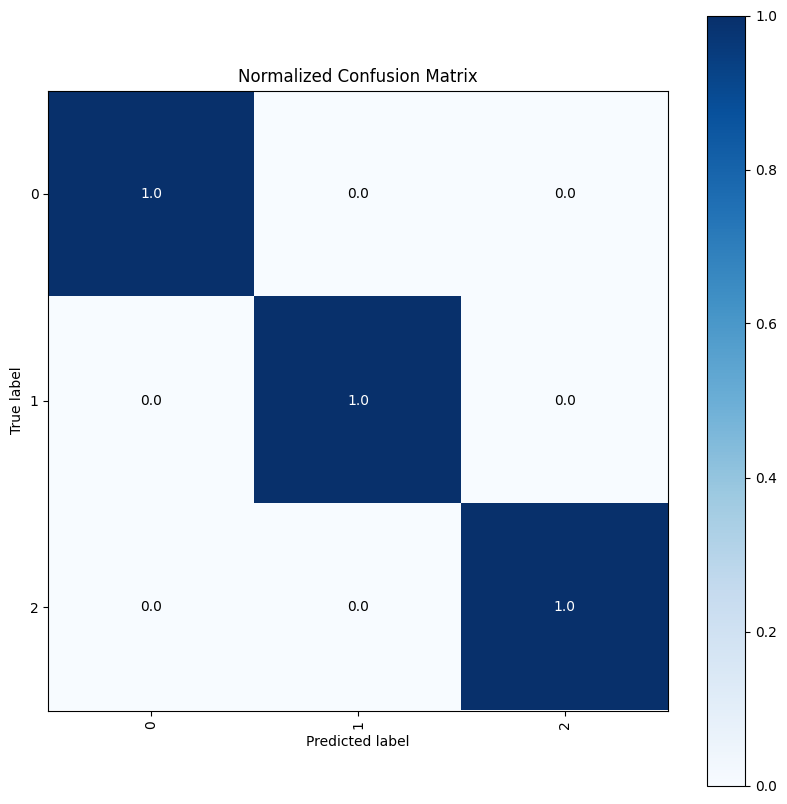

In [85]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')


